#

# Introduction

The AI is in summary, a simulation of the human intelligence using computers. The straight forward application of AI is through Machine Learning(ML). ML is a subset of AI that focuses on algorithms allowing systems to learn from data and improve performance over time without being explicitly programmed. When using ML to addres a specific task, usually the following flow is followed:

1. Data Collection and Preprocessing: Gathering relevant data for the task at hand and cleaning and transforming the data into a suitable format.
2. Feature Extraction: Selecting and engineering relevant features from the data.
3. Model Selection: Choosing an appropriate ML algorithm or model.
4. Model Training: Training the model on the data.
5. Model Evaluation: Assessing the model's performance.
6. Model Deployment: Integrating the model into a system or application.

## Types of ML

### Supervised Learning

Supervised learning is a type of machine learning where the model is trained on labeled data. Labeled data is data that has a known output. The goal of supervised learning is to learn a function that maps input data to output data.

### Unsupervised Learning   

Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. Unlabeled data is data that has no known output. The goal of unsupervised learning is to learn a function that maps input data to output data.

### Reinforcement Learning

Reinforcement learning is a type of machine learning where the model is trained on a reward system. The goal of reinforcement learning is to learn a function that maps input data to output data.


## Optimization Techniques
### Gradient Descent

Gradient descent is an optimization algorithm used in machine learning to minimize a function by iteratively moving towards the steepest descent direction. When you choose a model, you must define a mathematical method to find patterns in a set of data by adjusting what is called the model's parameters. The goal is to find the best parameters to minimize the error between the predicted output and the actual output. To do this, we define a function $J$(let's call it **loss function**) that measures the error of the model's predictions.  A quick example to grasp what is going on:

Let's consider the simplest  machine learning problem where we can use gradient descent, namely **Linear Regression**. Say we have a set of data points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$ and we want to find a line $y = mx + b$ that fits the data. We can define the loss function as the sum of the absolute differences between the predicted output and the actual output:

$$J(m, b) = \sum_{i=1}^n |\hat y_i - y_i|$$

Where $\hat y_i = mx_i + b$ is the predicted output with parameters $m$ and $b$, and $y_i$ is the actual output. So, we have:
1. The data: $(x_i, y_i)_{i=1}^n$
2. The model: $\hat y_i = mx_i + b$
3. The loss function: $J(m, b) = \sum_{i=1}^n |\hat y_i - y_i|$

Now, the mathematical form of the Gradient Descent algorithm is:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

Where $\theta_j$ is the parameter to be updated, $\alpha$ is the learning rate, and $\frac{\partial}{\partial \theta_j} J(\theta)$ is the partial derivative of the loss function with respect to the parameter $\theta_j$. Ifwe use vector notation, we can write:

$$\theta := \theta - \alpha \nabla J(\theta)$$

Where $\theta$ is a vector of parameters, $\alpha$ is the learning rate, and $\nabla J(\theta)$ is the gradient of the loss function with respect to the parameters $\theta$. Since we are using the derivative of the loss function, we must be careful choosing the loss function for this kind of Gradient Descent. So instead of using the absolute differences, we can use the squared differences:

$$J(m, b) = \sum_{i=1}^n (\hat y_i - y_i)^2$$

We know that cuadratic functions are smooth and differentiable, plus the fact that squaring penalizes larger errors more. Ok, where the idea of Gradient Descent comes from? Well, in multivariate calculus (you must be familiar with it if you are an AI student), the directional derivative of a multivariable function is the rate of change of the function in a given direction. The gradient of a function is a vector that points in the direction of the greatest rate of change of the function. Therefore, if the gradient $\nabla J(\theta)$ exists for a point $\theta$, then we can take the negative of the gradient to find the direction of the greatest rate of decrease of the function. Once we have the direction that points downhill, we can take a step in that direction and repeat the process until we reach the minimum of the function. The size of the step depends on $||\nabla J(\theta)||$ and $\eta$, called learning rate. The process is very easy t implement. You can see it in the animation below. Fell free to change the learning rate and the initial point and use **play** and **playbackwards** to see how the algorithm works.

















In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from _1_math_techniques_in_ML import SymbGradientDescendent
import sympy as sp


def plot_gradient_descent(_gd:SymbGradientDescendent, initial_point, learning_rate, iterations):
    points = _gd.run(learning_rate, initial_point, iterations)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)
    Z = _gd.function_numeric(X, Y)

    ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

    gd_points, = ax.plot([], [], [], 'ro-', markersize=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Gradient Descent on $z = x^2 + y^2$')

    def init():
        gd_points.set_data([], [])
        gd_points.set_3d_properties([])
        return gd_points,

    def update(num):
        gd_points.set_data(points[:num, 0], points[:num, 1])
        gd_points.set_3d_properties(_gd.function_numeric(points[:num, 0], points[:num, 1]))
        return gd_points,

    ani = FuncAnimation(fig, update, frames=len(points), init_func=init, blit=False, repeat=False)


    hrml_ani = HTML(ani.to_jshtml())

    plt.close(fig=fig)

    return hrml_ani


initial_point = np.array([-8.0, 8.0])
learning_rate = 0.1
iterations = 30

x, y = sp.symbols('x y')
func = x**2 + y**2

gd = SymbGradientDescendent(func, [x, y])

plot_gradient_descent(gd, initial_point, learning_rate, iterations)

In the following code, we'll apply the Gradient Descent algorithm to the task of Linear Regression.

theta_0, theta_1: 1.97, 1.15


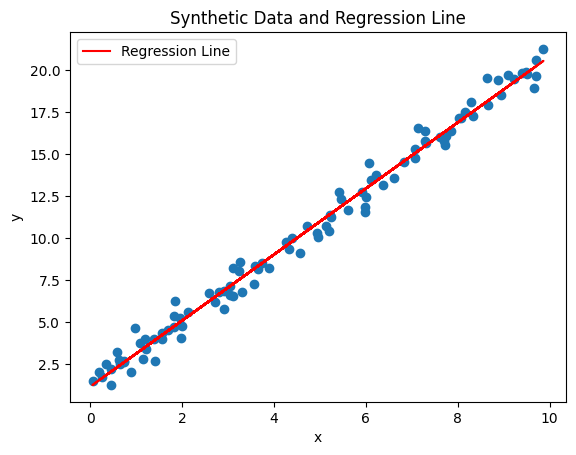

In [4]:
from _1_math_techniques_in_ML import SymbGradientDescendent
# Generating synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)*0.7 
m = len(X)

gradient = [lambda theta_0, theta_1: (1/m)*np.sum((theta_0*X + theta_1 - y)*X),
            lambda theta_0, theta_1: (1/m)*np.sum((theta_0*X + theta_1 - y))]

initial_params = [0, 0]
max_iter = 1000
learning_rate = 0.02
opt = SymbGradientDescendent.non_symb_gradient_descendent(gradient, learning_rate, initial_params, max_iter)
print(f"theta_0, theta_1: {opt[0]:.2f}, {opt[1]:.2f}")

plt.scatter(X, y)
plt.title("Synthetic Data and Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X, opt[0]*X + opt[1], 'r-', label='Regression Line')
plt.legend()
plt.show()